In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
train_data = pd.read_csv('../data/train_processed.csv', index_col=0)
test_data = pd.read_csv('../data/test_processed.csv', index_col=0)

In [13]:
train_data.head(10)

,SiteId,Value,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,,
2014-09-03 00:00:00,1,9.096555e+05,2,3,246,9,2014,0.0,8.660254e-01,-0.5,-0.888057,-0.459733,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,19.0
2014-09-04 00:00:00,1,1.748273e+06,3,4,247,9,2014,0.0,1.224647e-16,-1.0,-0.895839,-0.444378,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,20.0
2014-09-05 00:00:00,1,4.031663e+06,4,5,248,9,2014,0.0,-8.660254e-01,-0.5,-0.903356,-0.428892,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,22.0
2014-09-06 00:00:00,1,4.031663e+06,5,6,249,9,2014,0.0,-8.660254e-01,0.5,-0.910605,-0.413279,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,21.0
2014-09-07 00:00:00,1,4.031663e+06,6,7,250,9,2014,0.0,-2.449294e-16,1.0,-0.917584,-0.397543,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,13.0
2014-09-08 00:00:00,1,1.964878e+06,0,8,251,9,2014,0.0,0.000000e+00,1.0,-0.924291,-0.381689,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,12.0
2014-09-09 00:00:00,1,3.266904e+06,1,9,252,9,2014,0.0,8.660254e-01,0.5,-0.930724,-0.365723,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,17.0
2014-09-10 00:00:00,1,2.926094e+06,2,10,253,9,2014,0.0,8.660254e-01,-0.5,-0.936881,-0.349647,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,17.0
2014-09-11 00:00:00,1,1.720502e+06,3,11,254,9,2014,0.0,1.224647e-16,-1.0,-0.942761,-0.333469,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,23.0


In [14]:
test_data.head(10)

,SiteId,Value,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-29 00:00:00,1,7.413780e+06,5,29,241,8,2015,0.0,-8.660254e-01,0.5,-0.845249,-0.534373,-0.866025,-5.000000e-01,0.0,1.0,1.0,18.0,1387.205119,16.0
2015-08-30 00:00:00,1,8.927612e+06,6,30,242,8,2015,0.0,-2.449294e-16,1.0,-0.854322,-0.519744,-0.866025,-5.000000e-01,0.0,1.0,1.0,18.0,1387.205119,20.0
2015-08-31 00:00:00,1,7.288439e+06,0,31,243,8,2015,0.0,0.000000e+00,1.0,-0.863142,-0.504961,-0.866025,-5.000000e-01,0.0,1.0,0.0,18.0,1387.205119,20.0
2015-09-01 00:00:00,1,8.399679e+06,1,1,244,9,2015,0.0,8.660254e-01,0.5,-0.871706,-0.490029,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,21.7
2015-09-02 00:00:00,1,7.576456e+06,2,2,245,9,2015,0.0,8.660254e-01,-0.5,-0.880012,-0.474951,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,23.0
2015-09-03 00:00:00,1,5.952658e+06,3,3,246,9,2015,0.0,1.224647e-16,-1.0,-0.888057,-0.459733,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,22.0
2015-09-04 00:00:00,1,5.275581e+06,4,4,247,9,2015,0.0,-8.660254e-01,-0.5,-0.895839,-0.444378,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,20.0
2015-09-05 00:00:00,1,3.172143e+06,5,5,248,9,2015,0.0,-8.660254e-01,0.5,-0.903356,-0.428892,-1.000000,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,20.0
2015-09-06 00:00:00,1,2.655131e+06,6,6,249,9,2015,0.0,-2.449294e-16,1.0,-0.910605,-0.413279,-1.000000,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,21.0


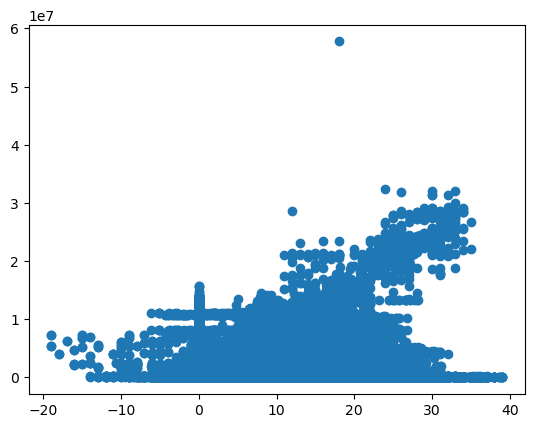

In [15]:
plt.scatter(train_data['Temperature'],train_data['Value'])
plt.show()

In [16]:
abnormal_data = train_data[train_data['Value'] >= 5 * 10e7]
abnormal_data.head(10)

,SiteId,Value,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,,


In [17]:
train = train_data[train_data['Value'] < 5 * 10e7]

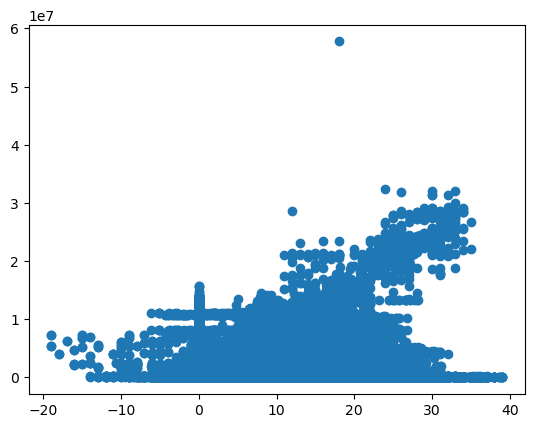

In [18]:
plt.scatter(train['Temperature'],train['Value'])
plt.show()

<Axes: xlabel='Surface', ylabel='Value'>

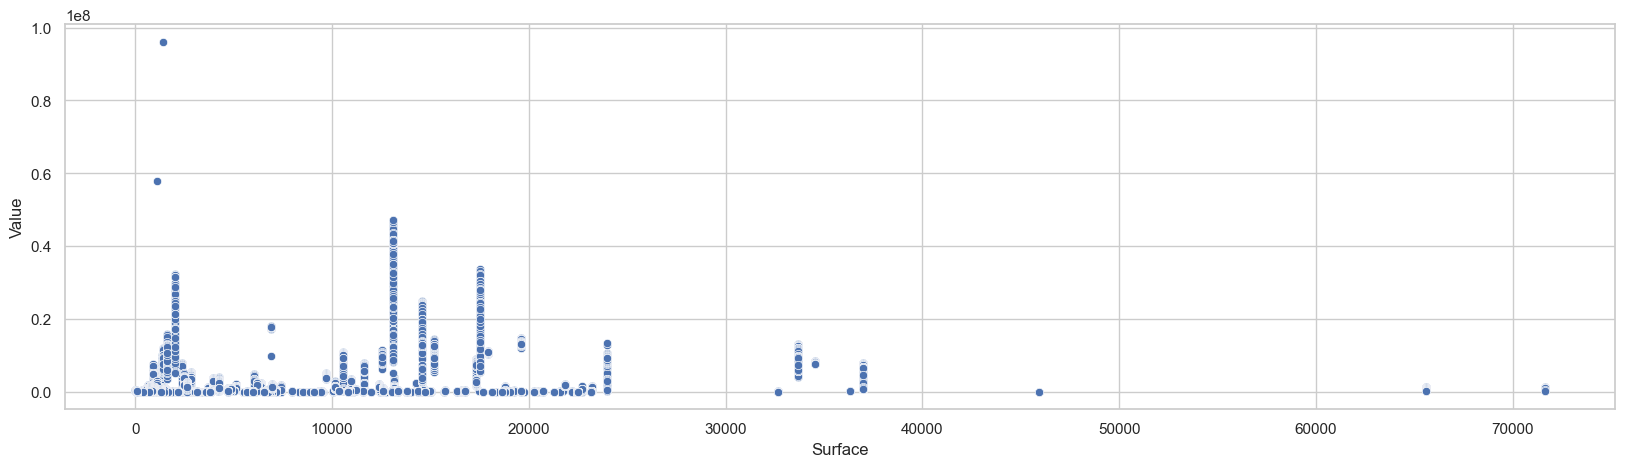

In [19]:
sns.set(style='whitegrid', rc={'figure.figsize':(20, 5)})
sns.scatterplot(x='Surface', y='Value', data=train)

In [20]:
train.groupby(['SiteId'])

In [21]:
train.groupby(['SiteId', 'month'])['Value'].mean()

SiteId  month
1       1        2.960420e+06
        2        4.040169e+06
        3        4.971537e+06
        4        3.746687e+06
        5        6.467709e+06
                     ...     
304     9        1.824698e+05
        10       1.390941e+05
        11       1.216203e+05
        12       1.157416e+05
305     11       1.832920e+03
Name: Value, Length: 1390, dtype: float64

In [22]:
train.groupby(['SiteId', 'wday'])['Value'].mean()

SiteId  wday
1       0       4.416954e+06
        1       5.420211e+06
        2       5.247044e+06
        3       4.951659e+06
        4       4.339463e+06
                    ...     
305     2       1.907900e+03
        3       1.655048e+03
        4       2.037650e+03
        5       1.835587e+03
        6       1.094181e+03
Name: Value, Length: 1869, dtype: float64